## Image Compression using K-Means

### Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

### Find Closest Centroids

In [2]:
def find_closest_centroids(X, centroids):
    
    K = centroids.shape[0]
    m = X.shape[0]
    n = X.shape[1]
    idx = np.zeros(m , dtype=int)
    
    for i in range(m):
        ci = 0
        min_cost = 10000000
        for k in range(K):
            cost = 0
            for j in range(n):
                cost = cost + (X[i][j] - centroids[k][j])**2
            if(cost < min_cost):
                min_cost = cost
                ci = k
        idx[i] = ci
    
    return idx

### Compute New Centroids

In [3]:
def compute_centroids(X, idx, K):
    
    m , n = X.shape
    centroids = np.zeros((K, n))    
    
    for k in range(K):
        xi_sum = np.zeros((n))
        Ck = 0
        for i in range(m):
            if(idx[i] == k):
                xi_sum = xi_sum + X[i]
                Ck = Ck + 1
        if(Ck > 0):
            centroids[k] = xi_sum / Ck         
    
    return centroids

### Centroid Initialization

In [4]:
def kMeans_init_centroids(X , K):
    
    m = X.shape[0]
    randidx = np.random.permutation(m)
    centroids = X[randidx[:K]]
    
    return centroids

### k-Means

In [5]:
def run_kMeans(X , initial_centroids , max_iters = 10):
    
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    for i in range(max_iters):
        idx = find_closest_centroids(X , centroids)
        centroids = compute_centroids(X , idx  , K)
        
    return centroids , idx

### Preprocessing

In [14]:
def load_image(image_path , resize_to = (1920, 1080)):
    
    original_image = Image.open(image_path)
    original_image = original_image.resize(resize_to)
    image_array = np.array(original_image, dtype = np.float64) / 255.0
    original_shape = image_array.shape
    image_data = image_array.reshape(-1 , 3)
    
    return image_data , original_image , original_shape

### Recreating Compressed Image

In [15]:
def recreate_image(centroids , idx , original_shape):
    
    compressed = centroids[idx].reshape(original_shape)
    
    return (compressed * 255).astype(np.uint8)

### Running the algorithm

In [16]:
image_path = "image.jpg" 

K = 8
max_iters = 10

image_data , original_image , original_shape  = load_image(image_path)
initial_centroids = kMeans_init_centroids(image_data , K)
centroids , idx = run_kMeans(image_data , initial_centroids , max_iters)
compressed_image = recreate_image(centroids , idx , original_shape)

### Plotting

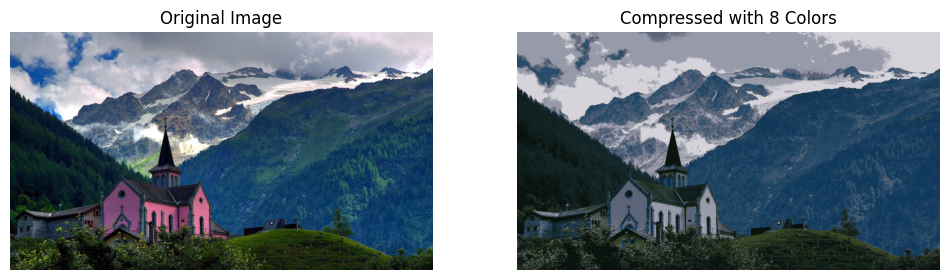

In [17]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(original_image)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(compressed_image)
plt.title(f"Compressed with {K} Colors")
plt.axis('off')

plt.show()